# BeVideo -  Make your own unique video with one sentence

## Setup

In [ ]:
#@markdown Check type of GPU and VRAM available.
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15101 MiB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/Shareddrives/모헤이/Bevideo

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shareddrives/모헤이/Bevideo


In [ ]:
#@title Install requirements
# %pip install -r requirements.txt
%pip install -q -U --pre triton
%pip install -q diffusers[torch]==0.11.1 kornia==0.6 transformers==4.26.0 bitsandbytes==0.35.4 \
decord accelerate omegaconf einops ftfy gradio imageio-ffmpeg xformers

In [ ]:
MODEL_NAME = "CompVis/stable-diffusion-v1-4" #@param {type:"string"}

In [ ]:
#@title Download pretrained model

#* Used Model "CompVis/stable-diffusion-v1-4"
MODEL_NAME = "CompVis/stable-diffusion-v1-4" #@param {type:"string"}

#@markdown If model should be download from a remote repo. Untick it if the model is loaded from a local path.
download_pretrained_model = True #@param {type:"boolean"}
if download_pretrained_model:
    !git lfs install
    !git clone https://huggingface.co/$MODEL_NAME checkpoints/$MODEL_NAME
    MODEL_NAME = f"./checkpoints/{MODEL_NAME}"
print(f"[*] MODEL_NAME={MODEL_NAME}")

Updated git hooks.
Git LFS initialized.
fatal: destination path 'checkpoints/CompVis/stable-diffusion-v1-4' already exists and is not an empty directory.
[*] MODEL_NAME=./checkpoints/CompVis/stable-diffusion-v1-4


## Usage


### Training


In [ ]:
#@markdown If model weights should be saved directly in google drive (takes around 4-5 GB).
save_to_gdrive = False #@param {type:"boolean"}
if save_to_gdrive:
    from google.colab import drive
    drive.mount('/content/drive')

#@markdown Enter the directory name to save model at.
FILE_NAME = "b-boy"
OUTPUT_DIR = f"outputs/{FILE_NAME}" #@param {type:"string"}
if save_to_gdrive:
    OUTPUT_DIR = "/content/drive/MyDrive/" + OUTPUT_DIR

print(f"[*] Weights will be saved at {OUTPUT_DIR}")

!mkdir -p $OUTPUT_DIR


[*] Weights will be saved at outputs/b-boy


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ls

checkpoints/  LICENSE     README.md         stableDreamfusion/
configs/      notebooks/  requirements.txt  train_tuneavideo.py
data/         outputs/    results/          tuneavideo/


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#@markdown Upload your video by running this cell.

#@markdown OR

#@markdown You can use the file manager on the left panel to upload (drag and drop) to `data` folder.
#!!!!!!!!!!Choose between video and image!!!!!! #
#############[VIDEO]####################

import os
from google.colab import files
import shutil

uploaded = files.upload()
for filename in uploaded.keys():
    dst_path = os.path.join("data", filename)
    print(dst_path)
    shutil.move(filename, dst_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Uplaod your image by running this cell.
#!!!!!!!!!!Choose between video and image!!!!!! #
#############[IMAGE]####################
import os
from google.colab import files
import shutil

is_static = True
uploaded = files.upload()
for filename in uploaded.keys():
    dst_path = os.path.join("data/photos", filename)
    print(dst_path)
    shutil.move(filename, dst_path)

#* Duplicate images
import shutil
for i in range(3):
  shutil.copy(f'data/photos/{filename}', f"data/photos/{i}_{filename}")

Saving coffee.jpg to coffee.jpg
data/photos/coffee.jpg


In [ ]:
# Uplaod your image by running this cell.
#!!!!!!!!!!Choose between video and image!!!!!! #
#############[IMAGE]####################
#* Create a video through same photos
import cv2
import os

image_folder = 'data/photos'
video_name = 'video.avi'
print(filename)
v_name = filename.replace('.png', '')
v_name = filename.replace('.jpg', '')

images = [img for img in os.listdir(image_folder) if img.endswith(f"{filename}")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

coffee.jpg


In [ ]:
#Uplaod your image by running this cell.
#!!!!!!!!!!Choose between video and image!!!!!! #
#############[IMAGE]####################
def convert_avi_to_mp4(avi_file_path, output_name):
    os.popen("ffmpeg -i '{input}' -ac 2 -b:v 2000k -c:a aac -c:v libx264 -b:a 160k -vprofile high -bf 0 -strict experimental -f mp4 '{output}.mp4'".format(input = avi_file_path, output = output_name))
    return True

convert_avi_to_mp4('video.avi', v_name)

True

In [ ]:
# Uplaod your image by running this cell.
#!!!!!!!!!!Choose between video and image!!!!!! #
#############[IMAGE]####################
v_name = filename.replace('.png', '.mp4')
v_name = filename.replace('.jpg', '.mp4')
shutil.move(f'{v_name}', "data/")
os.remove("video.avi")

In [ ]:
#만약 주인공의 각도를 조정하고 싶다면 https://huggingface.co/spaces/cvlab/zero123-live 를 이용하거나 nerf를 통해 다른 각도의 이미지를 생성한다.
print(FILE_NAME)

b-boy


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#@markdown Train config

from omegaconf import OmegaConf
is_static = True
CONFIG_NAME = f"configs/{FILE_NAME}.yaml" #@param {type:"string"}

train_video_path = f"data/{FILE_NAME}.mp4" #@param {type:"string"}
train_prompt = "The man spins a somersault." #@param {type:"string"}
video_length = 4 #@param {type:"number"}
width = 512 #@param {type:"number"}
height = 512 #@param {type:"number"}
learning_rate = 3e-5 #@param {type:"number"}
train_steps = 300 #@param {type:"number"}

config = {
  "is_static": is_static,
  "pretrained_model_path": MODEL_NAME,
  "output_dir": OUTPUT_DIR,
  "train_data": {
    "video_path": train_video_path,
    "prompt": train_prompt,
    "n_sample_frames": video_length,
    "width": width,
    "height": height,
    "sample_start_idx": 0,
    "sample_frame_rate": 2,
  },
  "validation_data": {
    "prompts": [
      "A panda spins a somersault.",
      "A girl spins a somersault.",
      "A bear spins a somersault.",
      "Iron Man spins a somersault.",
    ],
    "video_length": video_length,
    "width": width,
    "height": height,
    "num_inference_steps": 20,
    "guidance_scale": 12.5,
    "use_inv_latent": True,
    "num_inv_steps": 50,
  },
  "learning_rate": learning_rate,
  "train_batch_size": 1,
  "max_train_steps": train_steps,
  "checkpointing_steps": 1000,
  "validation_steps": 100,
  "trainable_modules": [
    "attn1.to_q",
    "attn2.to_q",
    "attn_temp",
  ],
  "seed": 33,
  "mixed_precision": "fp16",
  "use_8bit_adam": False,
  "gradient_checkpointing": True,
  "enable_xformers_memory_efficient_attention": True,
}

OmegaConf.save(config, CONFIG_NAME)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!accelerate launch train_tuneavideo.py --config=$CONFIG_NAME
# os.system(f"accelerate launch train_tuneavideo.py --config={CONFIG_NAME}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2023-06-16 15:01:05.052006: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[15:01:07] WARNING  The following values were not passed to        ]8;id=340280;file:///usr/local/lib/python3.10/dist-packages/accelerate/commands/launch.py\launch.py]8;;\:]8;id=412006;file:///usr/local/lib/python3.10/dist-packages/accelerate/commands/launch.py#913\913]8;;\
                    `accelerate launch` and had defaults used                   
                    instead:                                                    
                            `--num_processes` was set to a value                
                    of `1`                                                      
                            `--num_machines` was set to a value of              
                    `1`                                                         
                            `--mixed_precision` was set to a value              
                    of `'n

### Inference

In [ ]:
import torch
from torch import autocast
from diffusers import DDIMScheduler
from tuneavideo.pipelines.pipeline_tuneavideo import TuneAVideoPipeline
from tuneavideo.models.unet import UNet3DConditionModel
from tuneavideo.util import save_videos_grid

unet = UNet3DConditionModel.from_pretrained(OUTPUT_DIR, subfolder='unet', torch_dtype=torch.float16).to('cuda')
scheduler = DDIMScheduler.from_pretrained(MODEL_NAME, subfolder='scheduler')
pipe = TuneAVideoPipeline.from_pretrained(MODEL_NAME, unet=unet, scheduler=scheduler, torch_dtype=torch.float16).to("cuda")
pipe.enable_xformers_memory_efficient_attention()
pipe.enable_vae_slicing()

g_cuda = None

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead
The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


In [ ]:
#@markdown Can set random seed here for reproducibility.
g_cuda = torch.Generator(device='cuda')
seed = 1234 #@param {type:"number"}
g_cuda.manual_seed(seed)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DDIM inversion latent loaded from outputs/b-boy/inv_latents/ddim_latent-300.pt


  0%|          | 0/50 [00:00<?, ?it/s]

Continue DDIM with i = 0, t = 981, latent = torch.Size([1, 4, 1, 64, 64]), device = cuda:0, type = torch.float32
latent t1 found at i=1, t = 961
latent t0 found at i = 4, t = 901


  0%|          | 0/50 [00:00<?, ?it/s]

Continue DDIM with i = 2, t = 941, latent = torch.Size([1, 4, 4, 64, 64]), device = cuda:0, type = torch.float32


  0%|          | 0/50 [00:00<?, ?it/s]

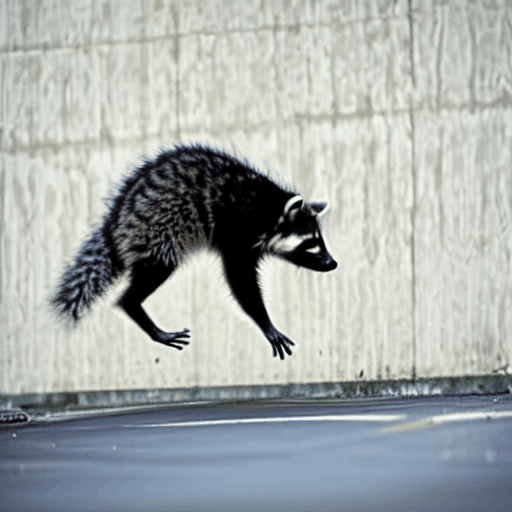

In [ ]:
#@markdown Run for generating videos.

prompt = "a raccoon is somersault" #@param {type:"string"}
negative_prompt = "" #@param {type:"string"}
use_inv_latent = True #@param {type:"boolean"}
inv_latent_path = "" #@param {type:"string"}
num_samples = 1 #@param {type:"number"}
guidance_scale = 12.5 #@param {type:"number"}
num_inference_steps = 50 #@param {type:"number"}
video_length = 4 #@param {type:"number"}
height = 512 #@param {type:"number"}
width = 512 #@param {type:"number"}

ddim_inv_latent = None
if use_inv_latent and inv_latent_path == "":
    from natsort import natsorted
    from glob import glob
    import os
    inv_latent_path = natsorted(glob(f"{OUTPUT_DIR}/inv_latents/*"))[-1]
    ddim_inv_latent = torch.load(inv_latent_path).to(torch.float16)
    print(f"DDIM inversion latent loaded from {inv_latent_path}")

with autocast("cuda"), torch.inference_mode():
    videos = pipe(
        prompt,
        latents=ddim_inv_latent,
        video_length=video_length,
        height=height,
        width=width,
        negative_prompt=negative_prompt,
        num_videos_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=g_cuda
    ).videos

save_dir = "./results" #@param {type:"string"}
save_path = f"{save_dir}/{prompt}.gif"
save_videos_grid(videos, save_path)

# display
from IPython.display import Image, display
display(Image(filename=save_path))

In [ ]:
#@markdown Free runtime memory
# exit()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
